# About Project
**Group No: 6**

**Group Members: Rahul Hipparkar, Lily Holmes, Andrea Caceres, Isra Marcu**

**Project Name: Campus Event Scheduling System**

**Github Repo link**:  https://github.com/RahulHipparkar/DSA-GP1---Campus-Event-Scheduling-System

**Objective**: We’ve been hired to design a lightweight scheduling system for managing campus events (talks, hackathons, concerts, exams, etc.). The system must allow adding, searching, sorting, and conflict-checking events efficiently as the event list grows from a handful to thousands.

Our group will design and implement custom data structures and algorithms to power the system, compare their performance, and present results.




# Importing files as modules

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from src.models.event import Event
from src.models.ArrayList import DynamicArray
from src.models.LinkedList import LinkedList
from src.searching.Linear_Search import linear_search
from src.searching.Binary_Search import binary_search
from src.sorting.Get_Key import key
from src.sorting.Insertion_Sort import insertion_sort
from src.sorting.Slicing import slice_array
from src.sorting.Merge_Sort import merge_sort
from src.sorting.Quick_Sort import quick_sort
from src.sorting.Insertion_Sort_Linked_List import insertion_sort_linked_list
from src.sorting.Merge_Sort_Linked_List import merge_sort_list
from src.sorting.Quick_Sort_Linked_List import quickSort
from src.searching.Conflict_Detection import display_conflicts

Matplotlib is building the font cache; this may take a moment.


# Random generator for dynamic array

In [8]:
import datetime
import random
import time
def random_time():
    hour = random.randint(0, 23)
    minute = random.randint(0, 59)
    return f"{hour:02d}:{minute:02d}"
def random_date():
# initialize start and end dates
  start_date = datetime.date(2025, 8, 22)
  end_date   = datetime.date(2026, 5, 15)

  # create a single random day
  num_days = (end_date - start_date).days
  rand_days = random.randint(1, num_days)
  random_date = start_date + datetime.timedelta(days = rand_days)

  return random_date.strftime("%Y-%m-%d")

def create_random_DynamicArray(n):
  titles = ["talk", "hackathon", "concert", "exam", "orientation"]
  locations = ["Baca", "Folsom", "Norlin Room A", "Norlin Room B"]

  event_schedule = DynamicArray() # dynamic array instance

  for i in range(n):
    id = random.randint(1,10000)
    title = random.choice(titles)
    date = random_date()
    time = random_time() # 24 hour time, 8am to 8pm
    location = random.choice(locations)

    e = Event(id, title, date, time, location)
    event_schedule.append(e)

  return event_schedule

In [9]:
arr = create_random_DynamicArray(50)
arr.list_all()

[{'Id': 1536, 'Title': 'concert', 'Date': '2026-01-12', 'Time': '05:52', 'Location': 'Norlin Room A'},
 {'Id': 6773, 'Title': 'talk', 'Date': '2025-11-24', 'Time': '04:42', 'Location': 'Norlin Room B'},
 {'Id': 4777, 'Title': 'talk', 'Date': '2025-11-13', 'Time': '02:21', 'Location': 'Norlin Room A'},
 {'Id': 3998, 'Title': 'exam', 'Date': '2026-04-27', 'Time': '02:35', 'Location': 'Norlin Room B'},
 {'Id': 8866, 'Title': 'hackathon', 'Date': '2026-01-14', 'Time': '17:15', 'Location': 'Norlin Room A'},
 {'Id': 9560, 'Title': 'concert', 'Date': '2026-01-17', 'Time': '08:50', 'Location': 'Norlin Room B'},
 {'Id': 9746, 'Title': 'talk', 'Date': '2025-10-28', 'Time': '07:37', 'Location': 'Norlin Room B'},
 {'Id': 5302, 'Title': 'talk', 'Date': '2025-12-26', 'Time': '09:10', 'Location': 'Norlin Room B'},
 {'Id': 3872, 'Title': 'exam', 'Date': '2025-10-13', 'Time': '01:12', 'Location': 'Norlin Room A'},
 {'Id': 3403, 'Title': 'exam', 'Date': '2025-11-18', 'Time': '11:23', 'Location': 'Baca'}

# Random Generator for Linked List

In [10]:
def create_random_LinkedList(n):
  titles = ["talk", "hackathon", "concert", "exam", "orientation"]
  locations = ["Baca", "Folsom", "Norlin Room A", "Norlin Room B"]

  event_schedule = LinkedList() # dynamic array instance

  for i in range(n):
    id = random.randint(1,10000)
    title = random.choice(titles)
    date = random_date()
    time = random_time() # 24 hour time, 8am to 8pm
    location = random.choice(locations)

    e = Event(id, title, date, time, location)
    event_schedule.append(e)

  return event_schedule

# Experimentation

## Comparing runtime of sorting algorithms for dynamic arrays

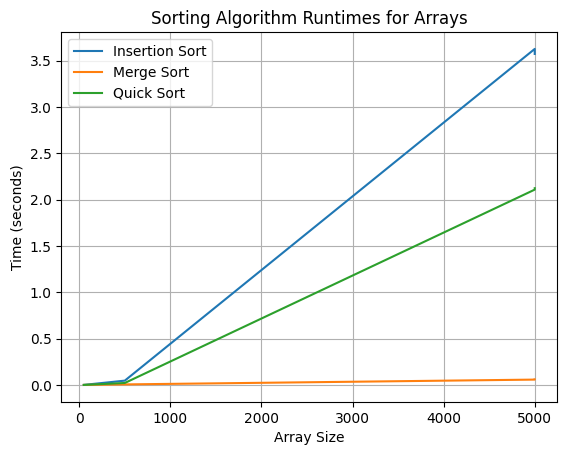

In [16]:
sys.setrecursionlimit(100000)
def measure_time(function):
  start = time.time()
  function()
  end= time.time()
  return round(end - start, 5)

merge_sort_runtime = []
insertion_sort_runtime = []
quick_sort_runtime = []

size = [50,500,5000,5000]
for i in size:
    arr = create_random_DynamicArray(i)
    merge_sort_runtime.append(measure_time(lambda: merge_sort(arr)))
    insertion_sort_runtime.append(measure_time(lambda: insertion_sort(arr)))
    quick_sort_runtime.append(measure_time(lambda: quick_sort(arr)))

plt.plot(size, insertion_sort_runtime, label='Insertion Sort')
plt.plot(size, merge_sort_runtime,label='Merge Sort')
plt.plot(size, quick_sort_runtime, label='Quick Sort')
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.title('Sorting Algorithm Runtimes for Arrays')
plt.legend()
plt.grid(True)